# Multiple Linear Regression Assignment


In [79]:
#Importing all the required libraries used to create the model

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


#For removing warnings
import warnings
warnings.filterwarnings('ignore')


## Reading and Understanding the data of the given data set


In [81]:
#Reading the data set

Bike_data = pd.read_csv("Downloads/day.csv")

In [82]:
Bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [83]:
Bike_data.shape

(730, 16)

In [84]:
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [85]:
#checking for null values or missing values in the data

Bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**There are no missing values in the given data set**

In [86]:
#Deleting the unwanted columns based on the understanding of the columns which are not helpful to make a model

#instant column:It is simply an index value which won't add any value to model
#dteday column: We already have year and month in the given dataset. So it's a redundant column
#casual and registered: cnt is cummulative value of both of these columns.

Bike_data.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [87]:
#Checking the head and shape of the dataset after dropping redundant columns

Bike_data.head(50)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.181250,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.686950,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.470250,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.606100,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.463500,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.660450,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.441950,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.112700,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.808750,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.544400,48.2917,14.958889,1321


In [88]:
Bike_data.shape

(730, 12)

### **Converting Weathersit, season, year, and month in to a categorical string values**

In [89]:
Bike_data.season = Bike_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [90]:
Bike_data.weathersit = Bike_data.weathersit.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

In [91]:
Bike_data.weekday = Bike_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [92]:
Bike_data.mnth = Bike_data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

### Visualizing the Categorical and Numerical columns to get some insights from the data set

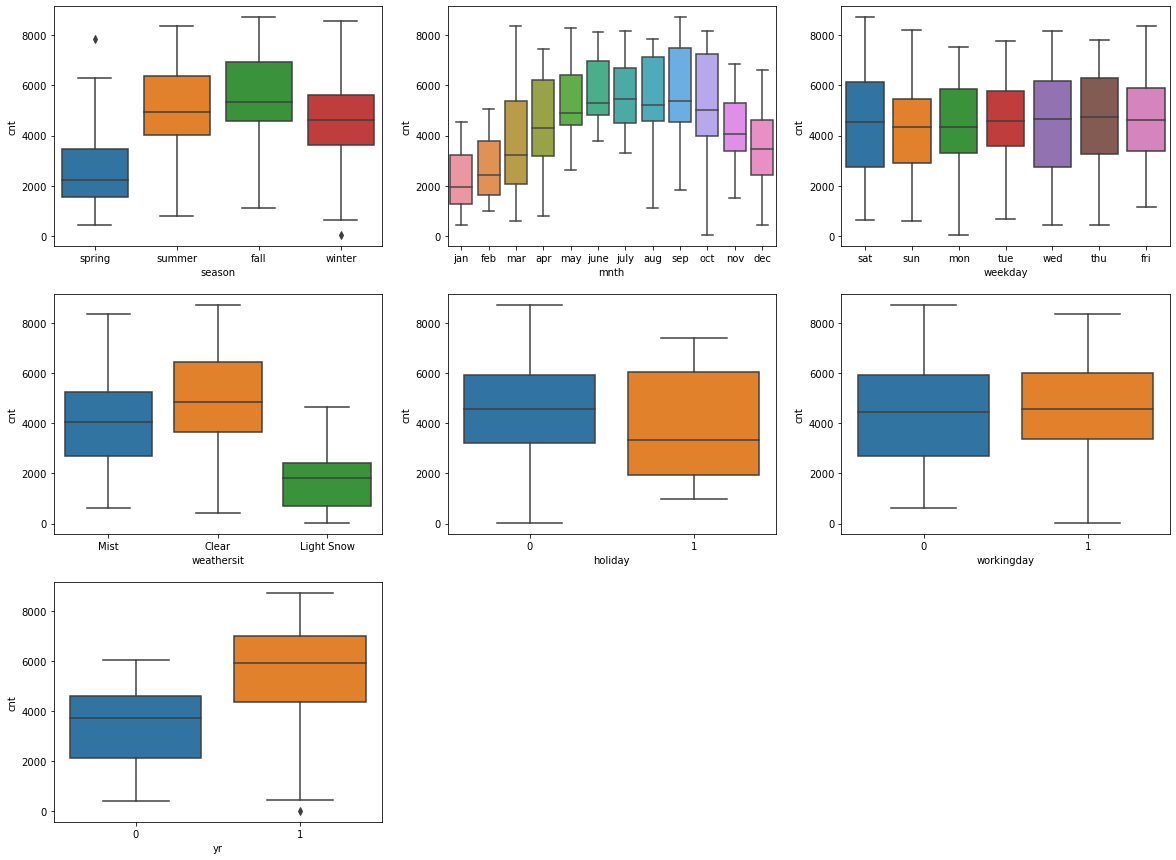

In [93]:
#Visualizing the categorical variables(predictor variables) like Season, yr, mnth, holiday, weekday, workingday, and weatghersit

#plotting the predicator variables against Target variable which is cnt

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_data)
plt.show()

All the categorical variables above are good predictors for dependendent variable

### Let's visualize the individual predictor variable against target variable to get insights


 

<AxesSubplot:xlabel='season', ylabel='cnt'>

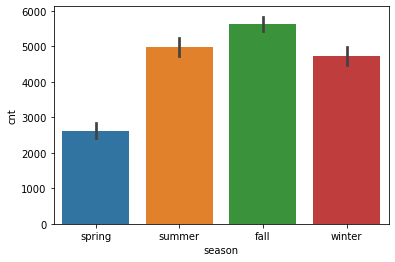

In [94]:
# season vs cnt

sns.barplot('season','cnt',data=Bike_data)

**We can conclude that fall season has more bookings compare to other seasons.**

<AxesSubplot:xlabel='yr', ylabel='cnt'>

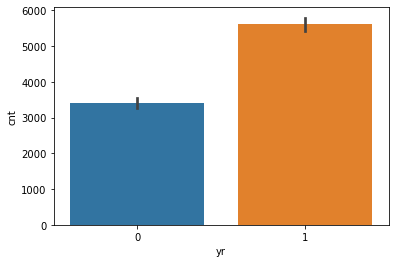

In [95]:
# yr vs cnt

sns.barplot('yr','cnt',data=Bike_data)

**We can clearly see that 2019 has more no of bookings compared to 2018, Which means the progression is good**

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

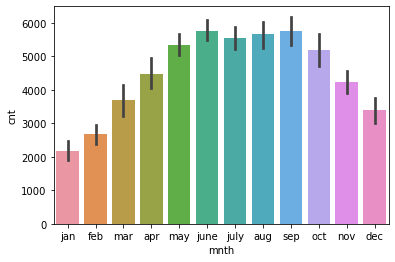

In [96]:
# mnth vs cnt

sns.barplot('mnth','cnt',data=Bike_data)

**June and september has more booking compared to other months however may, july, aug, and sep also having good no of bookings**

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

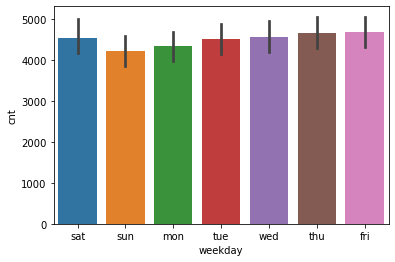

In [97]:
# weekday vs cnt

sns.barplot('weekday','cnt',data=Bike_data)

**There is not much difference between the day's of the week**

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

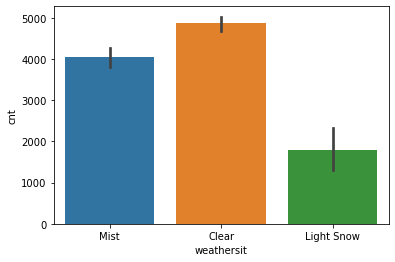

In [98]:
# weathersit vs cnt

sns.barplot('weathersit','cnt',data=Bike_data)

**We can clearly conclude that Clear  weather has attracted more no of bookings compare to other weathers**

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

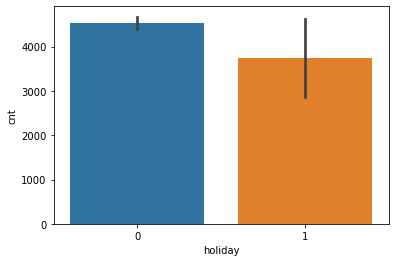

In [99]:
# holiday vs cnt

sns.barplot('holiday','cnt',data=Bike_data)

**It seems the no of bookings are less for holidays compared to not holiday**

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

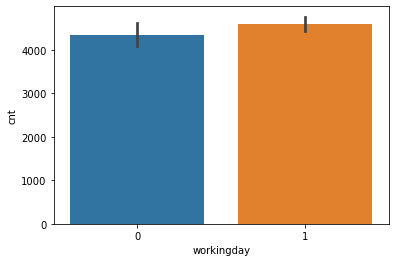

In [100]:
# workingday vs cnt

sns.barplot('workingday','cnt',data=Bike_data)

**There is no much difference between the working and non-working days**

**From the above plots of prdictor varaiables against target variable, We can conclude that all the categorical variables are good predictors fro the model. We can decide furhter which parameters are mostly contributed towards the cnt by using train and test data sets on created model**

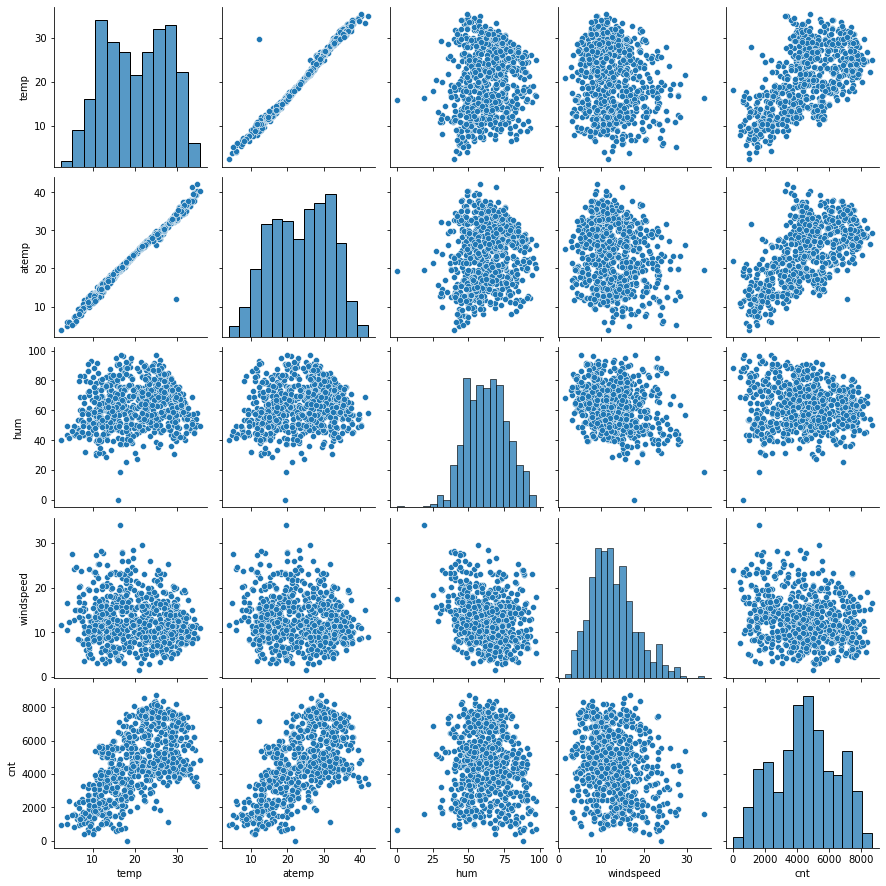

In [101]:
#Visualizing Numerical variables temp, atemp, hum, windspeed, and cnt

sns.pairplot(data=Bike_data,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

**We can clearly see that there is a linear relation between temp and atemp. Now checking for collinearity between numerical variables**

<AxesSubplot:>

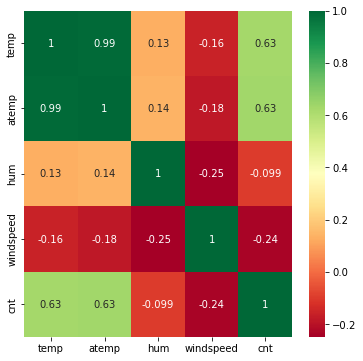

In [102]:
#Checking for correlation between numerical variables

plt.figure(figsize = (6,6))
sns.heatmap(Bike_data[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")

**From the above heatmap, we can conclude that there is a huge correlation between temp and atemp. So we need to drop either temp or atemp based on the VIF and p-values after building a model**

In [103]:
# Dummy variable creation for month, weekday, weathersit and season variables.

seasons_Bike = pd.get_dummies(Bike_data.season,drop_first=True)
months_Bike = pd.get_dummies(Bike_data.mnth,drop_first=True)
weekdays_Bike = pd.get_dummies(Bike_data.weekday,drop_first=True)
weathersit_Bike = pd.get_dummies(Bike_data.weathersit,drop_first=True)

In [104]:
# Now merging the bike data, with the dummy variables

Bike_data_new = pd.concat([Bike_data,seasons_Bike, months_Bike, weekdays_Bike, weathersit_Bike],axis=1)

In [105]:
Bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [106]:
# dropping season, mnth, weekday, and weathersit columns as already created dummy variable out of it.

Bike_data_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [107]:
#checking the new data set after dropping above columns

Bike_data_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


### Preaparing Train and Test sets

In [108]:
# Splitting the bike data frame in to tarina nd test sets

np.random.seed(0)
Bike_train, Bike_test = train_test_split(Bike_data_new, train_size = 0.7, random_state = 100)

In [109]:
#Shape of train set

Bike_train.shape

(510, 30)

In [110]:
#Shape of test set

Bike_test.shape

(220, 30)

In [111]:
#Shape of original bike data set

Bike_data_new.shape

(730, 30)

In [112]:
#Rescaling the numerical variables using MinMax scaling to scaling them in the range of 0 and 1. 
#The dummy variables are already in the range of 0 and 1. So need to scale them

#imitializing the minmax scalar object
scalar = MinMaxScaler()

#cretaing a list od numerical variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

# Fit on train data
Bike_train[num_vars] = scalar.fit_transform(Bike_train[num_vars])

In [113]:
Bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


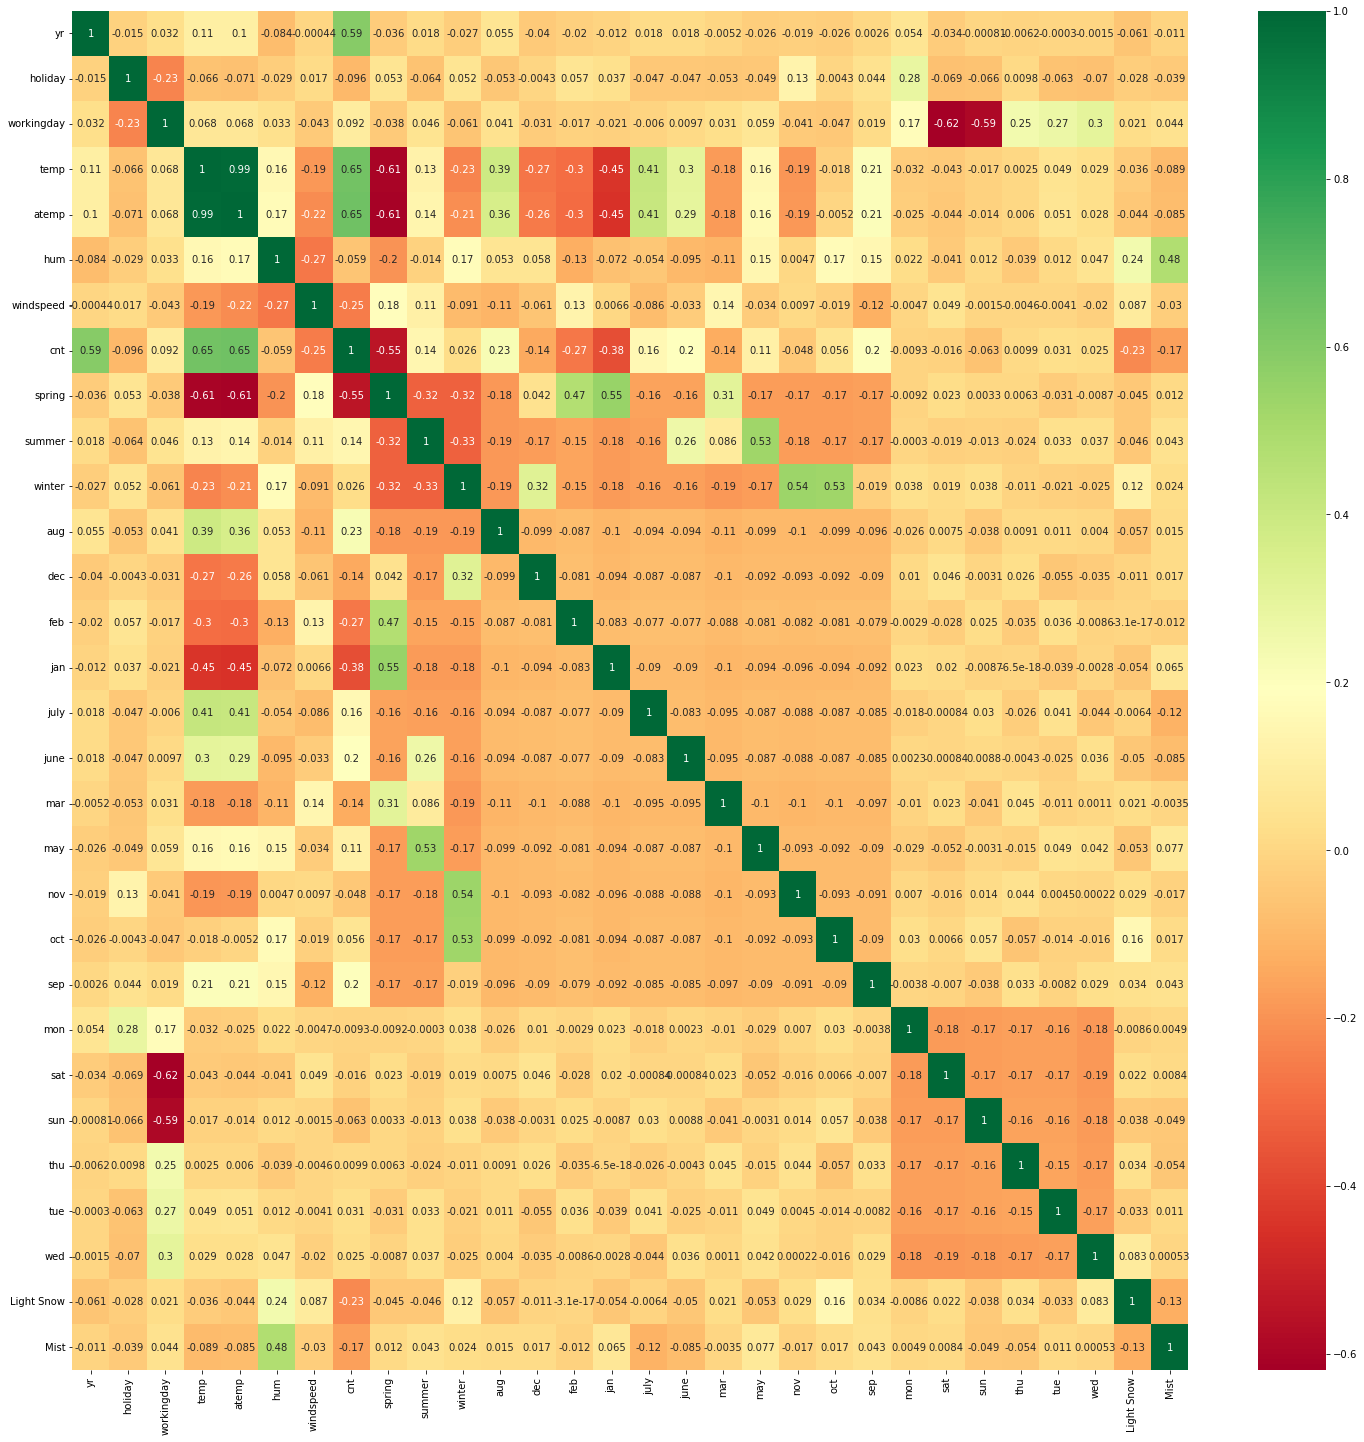

In [114]:
# checking for the correlation see which variables are highly correlated among them

plt.figure(figsize = (25,25))
sns.heatmap(Bike_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

**cnt seems to have correlation with year variable and temp**

**Spring season with Jan and Feb, Summer season with may, Winter season with oct, and nov month showing correlation**

**Misty and humidity also showing correlation**

**As we already seen temp and atemp have heighst correlation which cause the multicollinearity**


### Building the Model

In [115]:
#Dividing in to X and Y sets for the model building

y_train = Bike_train.pop('cnt')
X_train = Bike_train

In [116]:
#Building the model using recursive feature elimination(RFE)

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [117]:
#checking for the top 15 variables selected by the RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 15),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', False, 5),
 ('feb', False, 3),
 ('jan', False, 2),
 ('july', False, 11),
 ('june', False, 8),
 ('mar', False, 12),
 ('may', False, 4),
 ('nov', False, 6),
 ('oct', True, 1),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 10),
 ('wed', False, 14),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [118]:
# selecting the selected variable by RFE 

selected = X_train.columns[rfe.support_]
print(selected)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'aug', 'oct', 'sep', 'sat', 'sun', 'Light Snow', 'Mist'],
      dtype='object')


In [119]:
# checking the columns which has been rejected by RFE

X_train.columns[~rfe.support_]

Index(['atemp', 'spring', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may',
       'nov', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [120]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [121]:
# X train with RFE selected variables

X_train_rfe = X_train[selected]

In [122]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,31.45
11,sat,7.77
12,sun,7.65
1,holiday,2.14
4,hum,1.87
7,winter,1.71
3,temp,1.59
14,Mist,1.56
9,oct,1.49
8,aug,1.46


**Workingday shows the heighest VIF value**

In [123]:
# Building the first linear regression model

X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.70e-192
Time:                        02:04:40   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1640      0.022      7.507      0.0

In [124]:
# We can drop workingday variable as it has heighest VIF value of 31.45
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,14.75
2,temp,9.88
4,windspeed,3.65
6,winter,2.25
13,Mist,2.16
0,yr,2.02
5,summer,1.84
7,aug,1.60
8,oct,1.60
9,sep,1.34


In [125]:
# We can drop hum variable as it has heighest VIF value of 14.75 
X_train_new1 = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new1)

,Features,VIF
2,temp,5.22
3,windspeed,3.22
0,yr,2.01
5,winter,1.94
4,summer,1.83
6,aug,1.60
7,oct,1.59
12,Mist,1.49
8,sep,1.34
9,sat,1.22


**After removing 2 variables based on VIF, now the VIF values seems to be good now as it <10 and nearly 5**

In [126]:
#Building the second linear model after dropping workingday and hum columns

X_train_lm2 = sm.add_constant(X_train_new1)
lr2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.97e-188
Time:                        02:04:41   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1411      0.017      8.403      0.0

**From the above model, We can drop sat column which has heighest p-value**

In [127]:
# We can drop nov variable as it has high p-value
X_train_new2 = X_train_new1.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new2)

,Features,VIF
2,temp,5.19
3,windspeed,3.14
0,yr,2.01
5,winter,1.93
4,summer,1.83
6,aug,1.60
7,oct,1.59
11,Mist,1.49
8,sep,1.34
9,sun,1.17


**VIF values seems ok, So let's build another model**

In [128]:
# Building third linear regression model after dropping sat column

X_train_lm3 = sm.add_constant(X_train_new2)
lr3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.00e-189
Time:                        02:04:41   Log-Likelihood:                 507.32
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     497   BIC:                            -933.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1431      0.017      8.606      0.0

**From the above model, We can drop oct column which has heighest p-value**

In [129]:
# We can drop oct variable as it has high p-value
X_train_new3 = X_train_new2.drop(['oct'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new3)

,Features,VIF
2,temp,5.09
3,windspeed,3.13
0,yr,2.00
4,summer,1.82
6,aug,1.59
5,winter,1.49
10,Mist,1.49
7,sep,1.31
8,sun,1.17
9,Light Snow,1.08


In [130]:
# Building fourth linear regression model

X_train_lm4 = sm.add_constant(X_train_new3)
lr4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.46e-190
Time:                        02:04:41   Log-Likelihood:                 505.37
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     498   BIC:                            -935.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1387      0.017      8.394      0.0

In [131]:
lr4.params

const         0.138708
yr            0.232473
holiday      -0.104440
temp          0.518115
windspeed    -0.149731
summer        0.100242
winter        0.138412
aug           0.051237
sep           0.113697
sun          -0.048309
Light Snow   -0.287190
Mist         -0.083105
dtype: float64

### Residual Analysis of the train data and validation


In [132]:
X_train_lm4

,const,yr,holiday,temp,windspeed,summer,winter,aug,sep,sun,Light Snow,Mist
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.380981,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,1,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,0,0,1
79,1.0,0,0,0.462664,0.529881,1,0,0,0,0,0,1


In [133]:
y_train_pred = lr4.predict(X_train_lm4)

Text(0.5, 0.98, 'Error Terms')

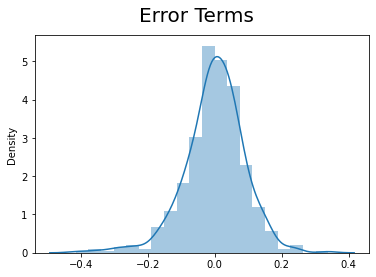

In [134]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 

**Error terms are following normal distribution**

In [135]:
calculateVIF(X_train_new3)

,Features,VIF
2,temp,5.09
3,windspeed,3.13
0,yr,2.00
4,summer,1.82
6,aug,1.59
5,winter,1.49
10,Mist,1.49
7,sep,1.31
8,sun,1.17
9,Light Snow,1.08


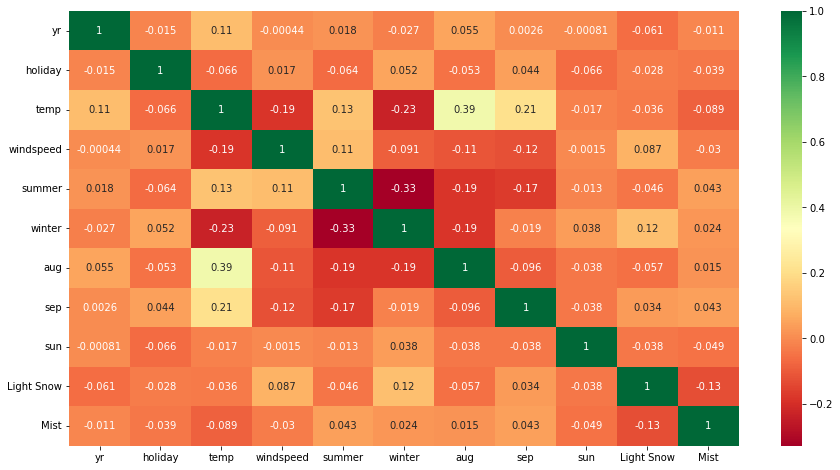

In [136]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new3.corr(),annot = True, cmap="RdYlGn")
plt.show()

**We can conclude that there is no multicolinearity as seen from the heatmap**



### Making Predictions Using the Final Model

In [139]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
Bike_test[num_vars] = scalar.transform(Bike_test[num_vars])
Bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [140]:
y_test = Bike_test.pop('cnt')
X_test = Bike_test

In [141]:
selected1 = X_train_new3.columns

X_test = X_test[selected1]

# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)

In [142]:
y_pred = lr4.predict(X_test_lm4)

In [143]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.797

In [144]:
#Checking for the coefficients od the final model
round(lr4.params,4)

const         0.1387
yr            0.2325
holiday      -0.1044
temp          0.5181
windspeed    -0.1497
summer        0.1002
winter        0.1384
aug           0.0512
sep           0.1137
sun          -0.0483
Light Snow   -0.2872
Mist         -0.0831
dtype: float64

**The equation of the best fitted line is** 

cnt = 0.1387 + 0.2325*yr - 0.1044*holiday + 0.5181*temp - 0.1497*windspeed + 0.1002*summer + 0.1384*winter +    0.0512*aug + 0.1137*sep - 0.0483*sun - 0.2872*Light Snow -0.0831*Mist

## Demand of bikes depend on year, holiday, temp, windspeed, summer, winter, aug, sep, sun, Light Snow and mist.